In [2]:
import pyAgrum as gum
import numpy as np 
import pandas as pd 
import pyAgrum.lib.dynamicBN as gdyn
import pyAgrum.lib.notebook as gnb

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.curdir, '..', 'lib')))

import ktbn

In [4]:
dbn = gum.fastBN("x0->x1; x0->x2<-x1 ;y0->y2<-x1 ;y1->x1 ; z -> x2")
dbn

(pyAgrum.BayesNet@0x5ec59aaeee70) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 20, mem: 320o}

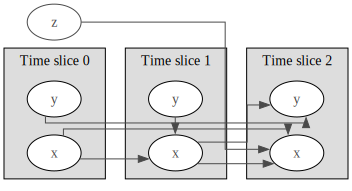

In [5]:
gdyn.showTimeSlices(dbn)

In [6]:
unrolled = ktbn.unrollKTBN(dbn,5)
gdyn.showTimeSlices(unrolled)

TypeError: split_name() missing 1 required positional argument: 'delimiter'

In [13]:
dbn.cpt('x1')

(pyAgrum.Potential@0x5ec59a7c7a80) 
             ||  x1               |
x0    |y1    ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3249  | 0.6751  |
1     |0     || 0.4867  | 0.5133  |
0     |1     || 0.9753  | 0.0247  |
1     |1     || 0.8980  | 0.1020  |

In [12]:
dbn2 = gum.fastBN('y1->x1<-x0')
dbn2.cpt('x1')

(pyAgrum.Potential@0x5ec59999f390) 
             ||  x1               |
y1    |x0    ||0        |1        |
------|------||---------|---------|
0     |0     || 0.1674  | 0.8326  |
1     |0     || 0.2885  | 0.7115  |
0     |1     || 0.3662  | 0.6338  |
1     |1     || 0.4417  | 0.5583  |

In [14]:
dbn2.cpt('x1').fillWith(dbn.cpt('x1'), dbn2.cpt('x1').names)
dbn2.cpt('x1')

(pyAgrum.Potential@0x5ec59999f390) 
             ||  x1               |
y1    |x0    ||0        |1        |
------|------||---------|---------|
0     |0     || 0.3249  | 0.6751  |
1     |0     || 0.9753  | 0.0247  |
0     |1     || 0.4867  | 0.5133  |
1     |1     || 0.8980  | 0.1020  |